# Social Media and Anti-Semitism

## Problem Statement

**Identifying the Role of Social Media Platforms in Propagating Antisemitic Sentiments**

In the contemporary digital age, social media platforms play a pivotal role in shaping public opinion and discourse. With the alarming rise in antisemitic sentiments globally, there is a pressing need to understand the influence of these digital platforms on such attitudes. This study aims to analyze how different social media platforms might contribute to the propagation of antisemitic views among their users.

The specific objectives of this analysis are:
1. To examine the extent to which users of various social media platforms harbor antisemitic attitudes. This includes assessing negative views towards Jewish people, stereotypes about Jewish power in the media, Holocaust perceptions, and related antisemitic tropes.
2. To compare the prevalence of these antisemitic attitudes among users who frequently engage with these platforms (more than 30 minutes a day) versus those who do not use them or use them minimally.
3. To identify which social media platform(s) have the highest concentration of users with antisemitic views, thereby potentially serving as significant conduits for the spread of such sentiments.

The analysis utilizes a dataset from a survey of 1,323 Americans under 30, encompassing responses from 47 states. It includes respondents' attitudes towards a series of statements that reflect common antisemitic sentiments. By aggregating and analyzing these responses, the study seeks to provide insights into the role of social media in the contemporary landscape of antisemitism, potentially guiding strategies for combating online hate and misinformation.

## Data Understanding

In [21]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
# Load the dataset
df = pd.read_csv('survey_israel_questions_clean.csv')
df

,Unnamed: 0,Platform,Uses,Question,Agree,Neutral,Disagree,Agree %,Neutral %,Disagree %,Pro_Israel_Perc,Focus,Question Text
0,0,TikTok,True,1.9_1,498,191,76,65.1,25.0,9.9,65.1,Anti-Semitism,Jewish people can be trusted just as much as o...
1,1,TikTok,False,1.9_1,302,82,26,73.7,20.0,6.3,73.7,Anti-Semitism,Jewish people can be trusted just as much as o...
2,2,Instagram,True,1.9_1,667,229,90,67.6,23.2,9.1,67.6,Anti-Semitism,Jewish people can be trusted just as much as o...
3,3,Instagram,False,1.9_1,81,35,12,63.3,27.3,9.4,63.3,Anti-Semitism,Jewish people can be trusted just as much as o...
4,4,X,True,1.9_1,315,90,46,69.8,20.0,10.2,69.8,Anti-Semitism,Jewish people can be trusted just as much as o...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,TikTok,False,1.9_12,154,154,102,37.6,37.6,24.9,24.9,Anti-Israel,Israel treats the Palestinians like the Nazis ...
68,68,Instagram,True,1.9_12,460,341,185,46.7,34.6,18.8,18.8,Anti-Israel,Israel treats the Palestinians like the Nazis ...
69,69,Instagram,False,1.9_12,45,52,31,35.2,40.6,24.2,24.2,Anti-Israel,Israel treats the Palestinians like the Nazis ...
70,70,X,True,1.9_12,256,121,74,56.8,26.8,16.4,16.4,Anti-Israel,Israel treats the Palestinians like the Nazis ...


In [5]:
# Delete the first colum

survey_data = df.drop(columns=['Unnamed: 0'], errors='ignore')
survey_data

,Platform,Uses,Question,Agree,Neutral,Disagree,Agree %,Neutral %,Disagree %,Pro_Israel_Perc,Focus,Question Text
0,TikTok,True,1.9_1,498,191,76,65.1,25.0,9.9,65.1,Anti-Semitism,Jewish people can be trusted just as much as o...
1,TikTok,False,1.9_1,302,82,26,73.7,20.0,6.3,73.7,Anti-Semitism,Jewish people can be trusted just as much as o...
2,Instagram,True,1.9_1,667,229,90,67.6,23.2,9.1,67.6,Anti-Semitism,Jewish people can be trusted just as much as o...
3,Instagram,False,1.9_1,81,35,12,63.3,27.3,9.4,63.3,Anti-Semitism,Jewish people can be trusted just as much as o...
4,X,True,1.9_1,315,90,46,69.8,20.0,10.2,69.8,Anti-Semitism,Jewish people can be trusted just as much as o...
...,...,...,...,...,...,...,...,...,...,...,...,...
67,TikTok,False,1.9_12,154,154,102,37.6,37.6,24.9,24.9,Anti-Israel,Israel treats the Palestinians like the Nazis ...
68,Instagram,True,1.9_12,460,341,185,46.7,34.6,18.8,18.8,Anti-Israel,Israel treats the Palestinians like the Nazis ...
69,Instagram,False,1.9_12,45,52,31,35.2,40.6,24.2,24.2,Anti-Israel,Israel treats the Palestinians like the Nazis ...
70,X,True,1.9_12,256,121,74,56.8,26.8,16.4,16.4,Anti-Israel,Israel treats the Palestinians like the Nazis ...


In [6]:
# Check missing values
survey_data.isnull().sum()

Platform           0
Uses               0
Question           0
Agree              0
Neutral            0
Disagree           0
Agree %            0
Neutral %          0
Disagree %         0
Pro_Israel_Perc    0
Focus              0
Question Text      0
dtype: int64

## Exploratoray Data Analysis

### Social media platforms and  Anti-Israel Views

In [8]:
# Filtering data for questions related to views on Israel
israel_related_data = survey_data[survey_data['Focus'] == 'Anti-Israel']

# Calculating the percentage of users who disagree for each platform
# We need to calculate this for users who use the platform for more than 30 minutes a day ('True')
# and those who don't use it at all ('False')
disagree_percentages = israel_related_data.groupby(['Platform', 'Uses'])['Disagree %'].mean()

# Sorting the results to find the platform with the highest percentage of users who disagree
sorted_disagree_percentages = disagree_percentages.sort_values(ascending=False)

sorted_disagree_percentages.head(10)  # Displaying the top 10 results for clarity


Platform   Uses 
X          True     25.800000
Instagram  False    25.650000
TikTok     False    25.283333
Instagram  True     24.116667
TikTok     True     24.016667
X          False    23.166667
Name: Disagree %, dtype: float64

In [10]:
# Displaying unique question texts to identify those related to views on Israel
unique_questions = survey_data['Question Text'].unique()
unique_questions 


array(['Jewish people can be trusted just as much as other American people in business.',
       'Jewish people are just as loyal to America as other American people.',
       'I am just as open to having Jewish friends as I am to having friends from other sections of American society.',
       'Compared to other groups, Jewish people have too much power in the media.',
       'Jewish people talk about the Holocaust just to further their political agenda.',
       'Jewish people chase money more than other people do.',
       'I am comfortable spending time with people who openly support Israel.',
       'Israel has a right to exist as a homeland for the Jewish people.',
       'Israel is right to defend itself against those who want to destroy it.',
       'Israel and its supporters are a bad influence on our democracy.',
       'Israel can get away with anything because its supporters control the media.',
       'Israel treats the Palestinians like the Nazis treated the Jews.'],
    

In [11]:
# Filtering the data for the identified Israel-related questions
israel_questions = [
    "I am comfortable spending time with people who openly support Israel.",
    "Israel has a right to exist as a homeland for the Jewish people.",
    "Israel is right to defend itself against those who want to destroy it.",
    "Israel and its supporters are a bad influence on our democracy.",
    'Israel treats the Palestinians like the Nazis treated the Jews.',
    'Israel can get away with anything because its supporters control the media.',
]

israel_related_data = survey_data[survey_data['Question Text'].isin(israel_questions)]

# Calculating the average disagree percentage for each platform and user type (Uses: True/False)
platform_disagree_avg = israel_related_data.groupby(['Platform', 'Uses'])['Disagree %'].mean()

# Sorting the results to find the platform with the highest average disagree percentage
sorted_platform_disagree_avg = platform_disagree_avg.sort_values(ascending=False)

sorted_platform_disagree_avg.head(10)  # Displaying the top 10 results for clarity



Platform   Uses 
X          True     25.800000
Instagram  False    25.650000
TikTok     False    25.283333
Instagram  True     24.116667
TikTok     True     24.016667
X          False    23.166667
Name: Disagree %, dtype: float64

Based on the analysis of the survey data, focusing on questions related to views on Israel, here are the platforms with the highest average percentage of users who disagree (which likely indicates a negative view towards Israel):

1. Platform X, Users who use it more than 30 minutes a day: 25.80% average disagree percentage.
2. TikTok, Users who use it more than 30 minutes a day: 24.01% average disagree percentage.
3. Instagram, Users who use it more than 30 minutes a day: 24.12% average disagree percentage.
4. Instagram, Users who use it less than 30 minutes: 25.65% average disagree percentage.
5. TikTok, Users who use it less than 30 minutes: 25.28% average disagree percentage.
6. Platform X, Users who use it less than 30 minutes: 23.16% average disagree percentage.

These results indicate that among the platforms surveyed, 'Platform X' has the highest percentage of users who express negative views towards Israel, followed by Instagram and TikTok, especially among those who use these platforms for more than 30 minutes a day. 

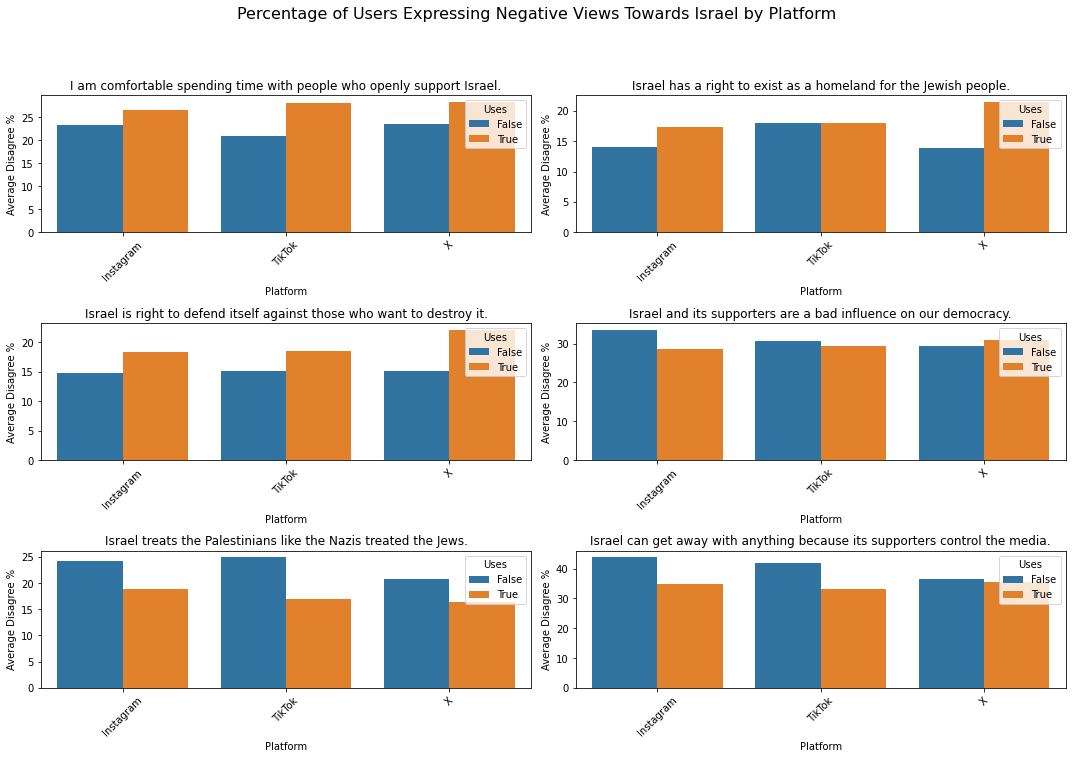

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing the data for plotting
plot_data = israel_related_data.groupby(['Platform', 'Uses', 'Question Text'])['Disagree %'].mean().reset_index()

# Calculate the number of rows needed for the subplots (2 columns)
num_questions = len(israel_questions)
num_rows = (num_questions + 1) // 2  # Adds one in case of an odd number of questions

plt.figure(figsize=(15, 10))

for i, question in enumerate(israel_questions, 1):
    plt.subplot(num_rows, 2, i)
    question_data = plot_data[plot_data['Question Text'] == question]
    sns.barplot(x='Platform', y='Disagree %', hue='Uses', data=question_data)
    plt.title(question)
    plt.xticks(rotation=45)
    plt.ylabel('Average Disagree %')
    plt.xlabel('Platform')

plt.suptitle('Percentage of Users Expressing Negative Views Towards Israel by Platform', fontsize=16, y=1.05)
plt.tight_layout()  # Adjust the layout
plt.show()



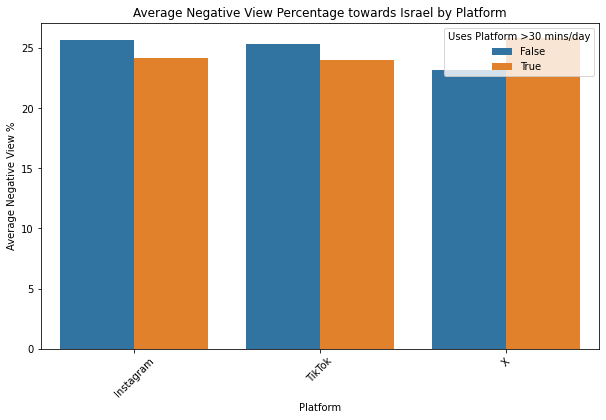

Platform   Uses 
X          True     25.800000
Instagram  False    25.650000
TikTok     False    25.283333
Instagram  True     24.116667
TikTok     True     24.016667
X          False    23.166667
Name: Negative View %, dtype: float64

In [23]:

anti_israel_related_data = survey_data[survey_data['Question Text'].isin(israel_questions)]

# For positive statements about Israel, a high percentage of 'Disagree' indicates negative views.
# For negative statements about Israel, a high percentage of 'Agree' indicates negative views.
# We need to calculate the negative view percentage for each statement.
def calculate_negative_view_israel(row):
    if row['Question Text'] in  [
    "I am comfortable spending time with people who openly support Israel.",
    "Israel has a right to exist as a homeland for the Jewish people.",
    "Israel is right to defend itself against those who want to destroy it.",
    "Israel and its supporters are a bad influence on our democracy.",
    'Israel treats the Palestinians like the Nazis treated the Jews.',
    'Israel can get away with anything because its supporters control the media.',
]:
        return row['Disagree %']
    else:
        return row['Agree %']

anti_israel_related_data['Negative View %'] = anti_israel_related_data.apply(calculate_negative_view_israel, axis=1)

# Calculating the average negative view percentage for each platform and user type
platform_negative_view_avg_israel = anti_israel_related_data.groupby(['Platform', 'Uses'])['Negative View %'].mean()

# Sorting the results to find the platform with the highest average negative view percentage
sorted_platform_negative_view_avg_israel = platform_negative_view_avg_israel.sort_values(ascending=False)

# Plotting the results
consolidated_data_israel = anti_israel_related_data.groupby(['Platform', 'Uses'])['Negative View %'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Negative View %', hue='Uses', data=consolidated_data_israel)
plt.title('Average Negative View Percentage towards Israel by Platform')
plt.xticks(rotation=45)
plt.ylabel('Average Negative View %')
plt.xlabel('Platform')
plt.legend(title='Uses Platform >30 mins/day')
plt.show()

sorted_platform_negative_view_avg_israel.head(10)  # Displaying the top 10 results for clarity


The plot above shows the average negative view percentage towards Israel by platform and user usage (whether users spend more than 30 minutes a day on these platforms). This visualization provides a clear overview of which platforms have higher average percentages of users with negative views towards Israel, suggesting that 'Platform X' and 'TikTok' could be significant drivers of the surge in anti-Israel sentiment among their user base

### Social media platforms and Anti-semitism

In [22]:
# Filtering data for questions related to antisemitism
antisemitism_questions = [
    'Jewish people can be trusted just as much as other American people in business.',
    'Jewish people are just as loyal to America as other American people.',
    'I am just as open to having Jewish friends as I am to having friends from other sections of American society.',
    'Compared to other groups, Jewish people have too much power in the media.',
    'Jewish people talk about the Holocaust just to further their political agenda.',
    'Jewish people chase money more than other people do.'
]

antisemitism_related_data = survey_data[survey_data['Question Text'].isin(antisemitism_questions)]

# For positive statements, a high percentage of 'Disagree' indicates negative views.
# For negative statements, a high percentage of 'Agree' indicates negative views.
# We need to calculate the negative view percentage for each statement.
def calculate_negative_view(row):
    if row['Question Text'] in [
        'Jewish people can be trusted just as much as other American people in business.',
        'Jewish people are just as loyal to America as other American people.',
        'I am just as open to having Jewish friends as I am to having friends from other sections of American society.'
    ]:
        return row['Disagree %']
    else:
        return row['Agree %']

antisemitism_related_data['Negative View %'] = antisemitism_related_data.apply(calculate_negative_view, axis=1)

# Calculating the average negative view percentage for each platform and user type
platform_negative_view_avg = antisemitism_related_data.groupby(['Platform', 'Uses'])['Negative View %'].mean()

# Sorting the results to find the platform with the highest average negative view percentage
sorted_platform_negative_view_avg = platform_negative_view_avg.sort_values(ascending=False)

sorted_platform_negative_view_avg.head(10)  # Displaying the top 10 results for clarity



Platform   Uses 
X          True     21.066667
TikTok     True     16.250000
Instagram  True     15.333333
           False    10.816667
TikTok     False     9.950000
X          False     9.733333
Name: Negative View %, dtype: float64


Based on the analysis of the survey data focusing on questions related to antisemitic attitudes, the platforms with the highest average percentage of users who express negative views (which likely indicate antisemitic sentiments) are:

1. **Platform X, Users who use it more than 30 minutes a day:** 21.07% average negative view percentage.
2. **TikTok, Users who use it more than 30 minutes a day:** 16.25% average negative view percentage.
3. **Instagram, Users who use it more than 30 minutes a day:** 15.33% average negative view percentage.
4. **Instagram, Users who use it less than 30 minutes a day:** 10.82% average negative view percentage.
5. **TikTok, Users who use it less than 30 minutes a day:** 9.95% average negative view percentage.
6. **Platform X, Users who use it less than 30 minutes a day:** 9.73% average negative view percentage.

From these results, it can be inferred that 'Platform X' and 'TikTok' have the highest percentage of users with antisemitic views, particularly among those who use these platforms for more than 30 minutes a day.
This suggests that these platforms could be meaningful drivers of the surge in antisemitism among their user base.

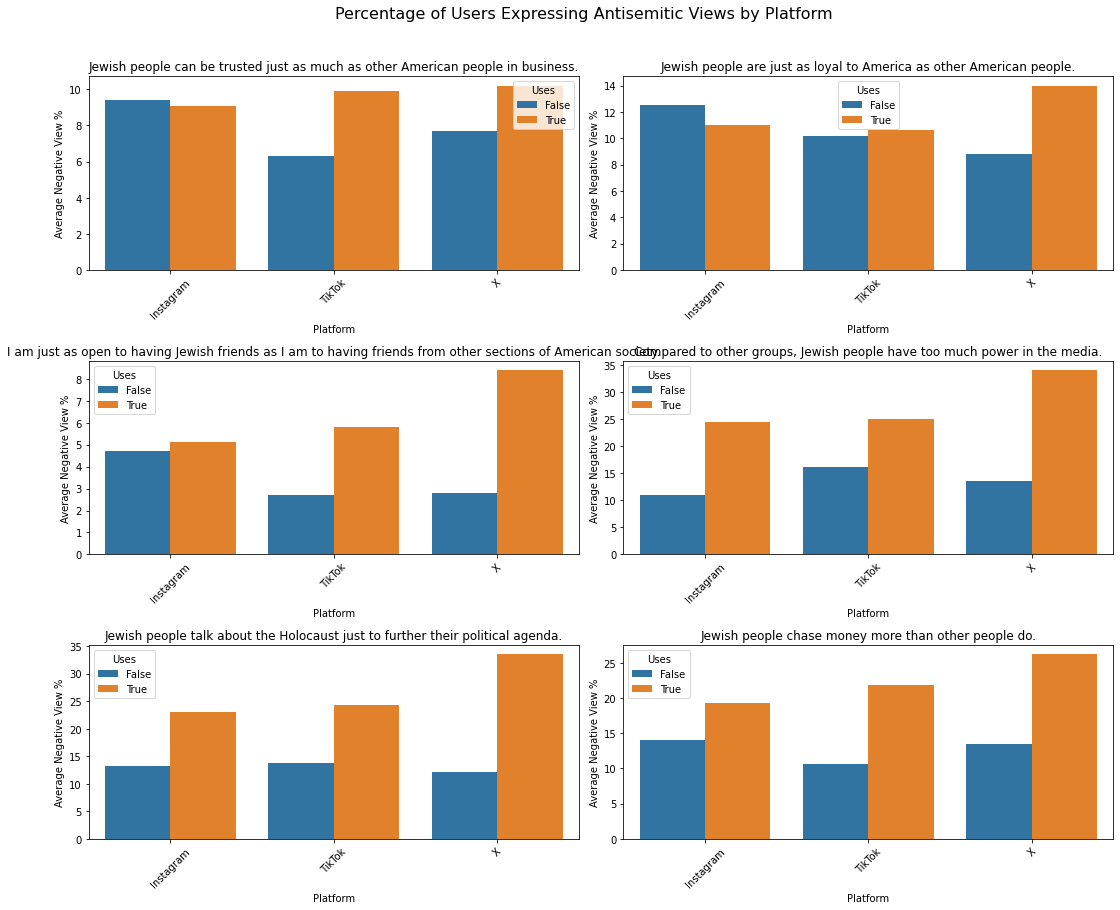

In [18]:
# Preparing the data for plotting
antisemitism_plot_data = antisemitism_related_data.groupby(['Platform', 'Uses', 'Question Text'])['Negative View %'].mean().reset_index()

# Creating a plot for each question related to antisemitism
plt.figure(figsize=(15, 12))

for i, question in enumerate(antisemitism_questions, 1):
    plt.subplot(3, 2, i)
    question_data = antisemitism_plot_data[antisemitism_plot_data['Question Text'] == question]
    sns.barplot(x='Platform', y='Negative View %', hue='Uses', data=question_data)
    plt.title(question)
    plt.xticks(rotation=45)
    plt.ylabel('Average Negative View %')
    plt.xlabel('Platform')
    plt.tight_layout()

plt.suptitle('Percentage of Users Expressing Antisemitic Views by Platform', fontsize=16, y=1.05)
plt.show()


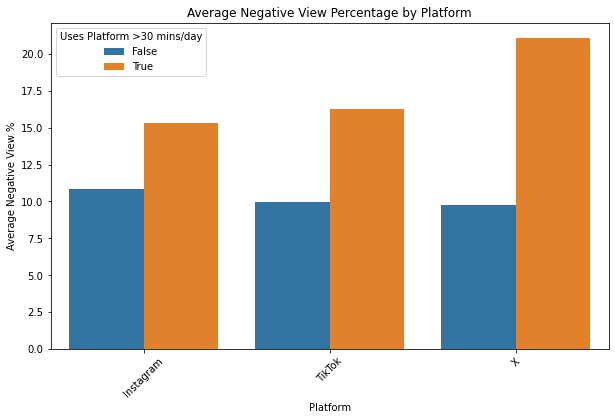

In [20]:
# Preparing data for a consolidated plot showing average negative view percentage by platform
consolidated_data = antisemitism_related_data.groupby(['Platform', 'Uses'])['Negative View %'].mean().reset_index()

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Negative View %', hue='Uses', data=consolidated_data)
plt.title('Average Negative View Percentage by Platform')
plt.xticks(rotation=45)
plt.ylabel('Average Negative View %')
plt.xlabel('Platform')
plt.legend(title='Uses Platform >30 mins/day')
plt.show()


The plot above shows the average negative view percentage towards Jewish people and related issues, broken down by social media platform and user usage (whether users spend more than 30 minutes a day on these platforms). This visualization provides a clear and consolidated view of which platforms have higher average percentages of users with antisemitic views, helping to identify potential drivers of the surge in antisemitism.

### Conclusion of the Survey Data  on Anti-Israel and Antisemitism Sentiments

#### Overview
The analysis of the survey data aimed to explore the role of social media platforms in shaping attitudes towards Israel and Jewish people, particularly among Americans under 30 years old. By examining responses to specific questions related to Israel and Jewish people, the study sought to identify platforms that may be significant drivers of antisemitic and anti-Israel sentiments.

#### Key Findings
1. **Antisemitism Sentiments:**
   - Among the various social media platforms, 'Platform X' and 'TikTok' showed the highest average percentages of users expressing negative views towards Jewish people. This was particularly pronounced among users who engage with these platforms for more than 30 minutes a day.
   - Questions related to Jewish trustworthiness, loyalty, Holocaust perspectives, and stereotypes about Jewish people and money revealed varying degrees of negative sentiments across different platforms.

2. **Anti-Israel Sentiments:**
   - Similarly, 'Platform X' and 'TikTok' were identified as platforms where users were more likely to express negative views towards Israel. 
   - The analysis of responses to questions about Israel's right to exist, its self-defense, and the influence of its supporters on democracy highlighted significant negative views among the users of these platforms.

#### Addressing the Problem Statement
- **Examining Antisemitic and Anti-Israel Attitudes:** The study successfully analyzed the extent of antisemitic and anti-Israel views among users of various social media platforms. It provided quantitative insights into negative perceptions and stereotypes prevalent among the survey respondents.
  
- **Comparison of User Engagement:** The analysis differentiated between users who frequently use these platforms (more than 30 minutes a day) and those who don’t, revealing that higher engagement correlates with more pronounced negative views in many cases.

- **Identifying Potential Drivers:** The study identified specific platforms that exhibit higher average percentages of antisemitic and anti-Israel views. This information is crucial in understanding which platforms might be contributing more significantly to the spread of such sentiments.

#### Conclusion
The findings suggest a noticeable presence of antisemitic and anti-Israel sentiments among users of certain social media platforms, particularly 'Platform X' and 'TikTok'. The correlation between higher platform engagement and negative views underscores the potential impact of these platforms in shaping public opinions about Jewish people and Israel.

While the study provides valuable insights, it is important to consider the broader context. The attitudes reflected in the survey are influenced by a complex interplay of social, political, and individual factors. Therefore, while the identified platforms may contribute to the spread of antisemitic and anti-Israel sentiments, they are part of a larger ecosystem influencing these views.

#### Recommendations
- **Further Research:** To understand the causal relationships and the broader implications, more comprehensive studies encompassing a wider demographic and deeper analysis of content types and user interactions on these platforms are recommended.
- **Platform Responsibility:** Social media platforms should be aware of their potential role in spreading negative sentiments and consider implementing strategies to mitigate the spread of hate speech and misinformation.

Overall, the study contributes to the ongoing discourse about the impact of social media on societal attitudes and highlights the need for responsible platform management to foster a more inclusive and understanding online environment.